# Import The Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import math

# Rearrange the data creating our train and test arrays

In [ ]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
#load data
"10,000 taining , 1000 testing, saved in 1D array of size 784"
"reshape it in form of 2D array with size 28*28, to be easily manipulated and Visualized, we will divide the photo into grids to help in feature extraction "

(train_images1, train_labels1), (test_images1, test_labels1) = mnist.load_data()
train_images=train_images1[:10000, :]
train_labels=train_labels1[:10000]
test_images=test_images1[:1000, :]
test_labels=test_labels1[:1000]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def label_reshape(arr_labele):
    label_vector = []
    for i in range(len(arr_labele)):
        label_vector.append([0 for _ in range(10)])
        x = arr_labele[i]
        label_vector[i][x] = 1
    return label_vector  

In [ ]:
train_labels = label_reshape(train_labels)
test_labels = label_reshape(test_labels)

In [ ]:
#checking the arrays
train_images.shape , type(train_images) , test_images.shape , type(test_images)

((10000, 28, 28), numpy.ndarray, (1000, 28, 28), numpy.ndarray)

# Plotting numbers

In [ ]:
#function to plot the number
def plot_img(mnist_index):
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

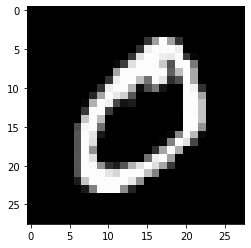

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#test the function
plot_img(train_images[1])
train_labels[1]

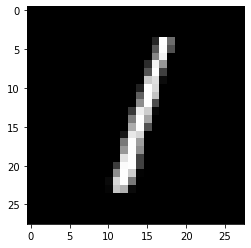

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#test function
plot_img(test_images[2])
test_labels[2]

# ReShaping image to small images

In [ ]:
# this function return same input but divided in n Grid Images each image with dimensions row * col (return image as bloks)
def imaged_grid(img , row , col ):
 
    """
        return same input but divided in nGrid Images  
        each image with dimensions row * col
    """
    x , y = img.shape
    "Return a new array of given shape and type, filled with zeros."
    array1 =np.zeros( ( (x//row)**2,row,col ) )
    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)    
    
    return (img.reshape( x//row, row, -1, col).swapaxes(1,2).reshape(-1, row, col))
    

In [ ]:
#test function
print(imaged_grid(test_images[5] , 7 , 7 ).shape)
imaged_grid(test_images[5] , 7 , 7 )

(16, 7, 7)


array([[[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,  77, 254, 107,   3,   0],
        [  0,  19, 227, 254, 254,   9,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
    

# Feature extraction by the centroid

In [ ]:
#return feature vector for current image 
def get_centroid(img):
    feature_vector = []
    #for loop on the grids
    for grid in imaged_grid(img , 7 , 14 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
        #for loop in each grid
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
          feature_vector.append( (Xc/sum))
          feature_vector.append( (Yc/sum) )
        else :
          #grid is empty
          feature_vector.append(0)
          feature_vector.append(0)
    
    return np.array(feature_vector)

In [ ]:
#test function
get_centroid(test_images[5])

array([ 0.        ,  0.        ,  5.63372093,  3.03571429,  5.65680473,
       13.        ,  2.90546139,  1.64500942,  3.69755601, 12.49083503,
        1.83811376,  0.35196889,  1.24121996, 12.03743068,  0.        ,
        0.        ])

# Creating test and train features 

In [ ]:
#create train feature
train_features = [get_centroid(img)  for img in train_images  ]


In [ ]:
train_features = np.array(train_features)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_features = sc.fit_transform(train_features)

In [ ]:
train_features.shape
train_features[:2]

array([[ 0.87385372,  0.6884393 ,  0.56012871,  1.11235156, -0.9730003 ,
         0.27663586, -1.63692101, -0.81631377,  1.78926222,  1.05684449,
         0.73042557, -0.02882525,  0.66215122, -0.11679613, -0.83192635,
        -0.49580436],
       [ 0.88417029,  0.93226785,  0.37323367,  0.23332144,  0.10792736,
         0.12995103, -0.77800934,  0.85923082,  0.23132966, -1.13966331,
         0.64127093,  1.17604578, -0.18933733,  0.12645455, -0.74967721,
        -0.4771885 ]])

In [ ]:
#create test feature
test_features = [get_centroid(img)  for img in test_images  ]

In [ ]:
test_features = np.array(test_features)

In [ ]:
test_features[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  1.19443729,
        9.54365182,  2.83908621,  3.84675671,  5.91555556, 12.98666667,
        2.97017501,  2.05669214,  2.86841394, 11.92785734,  0.90693739,
        0.1319797 ])

In [ ]:
class Layer:
    def __init__(self, input_size, output_size , activation_function):
        self.input = None
        self.output = []
        self.weights = []
        self.activation_function = activation_function
        ##nested loop to initailze the weigths with random values
        for i in range(input_size):
          col = []
          for j in range(output_size):
              col.append(random.random())
          self.weights.append(col)
        

    def forward_propagation(self, given_input  ):
        self.input = given_input
        self.output = []
        for col in range(len(self.weights[0])):
            sum = 0 
            for i in range(len(self.input) ):
                sum += self.input[i] * self.weights[i][col]
                
            if self.activation_function == "sigmoid" :
                self.output.append( 1/ (  1+(math.exp(-sum)) ))
            
       
        
        return self.output
        
        
    def back_propagation(self, previous_errors, learning_rate , targets):
        
        upcoming_error = []
        for i in range( len(self.input)):
            upcoming_error.append(0)

        
       #change the weights at the output layer
        if len(previous_errors) == 0 :
            for cur_neuron in range ( len(self.output) ) :
                delta_j = ( targets[cur_neuron] - self.output[cur_neuron] ) * self.output[cur_neuron]  * (1-self.output[cur_neuron])

                for upcoming_nueron in range( len( self.input) ) :
                    upcoming_error[upcoming_nueron] += delta_j * self.weights[upcoming_nueron][cur_neuron] 
                    self.weights[upcoming_nueron][cur_neuron] += ( delta_j * self.input[upcoming_nueron] * learning_rate)

      
        #change the weights at the hidden layer
        else :
                
            for cur_neuron in range ( len(self.output) ) :
                delta_j = previous_errors[cur_neuron] * self.output[cur_neuron]  * (1-self.output[cur_neuron]) 

                for upcoming_nueron in range( len ( self.input) ) :
                    
                    upcoming_error[upcoming_nueron] += delta_j * self.weights[upcoming_nueron][cur_neuron] 
                    self.weights[upcoming_nueron][cur_neuron] += delta_j * learning_rate * self.input[upcoming_nueron]
                    
                    
        return upcoming_error

In [ ]:
class Network:
    def __init__(self):
        self.layers = []

    def add(self, layer ):
        self.layers.append(layer )


    def predict(self, input_data):
        
        predicted = []
        for i in range( len(input_data) ):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output )
            predicted.append(output)

        return predicted


    def fit(self, train_data, train_labels, epochs, learning_rate):
        
        samples = len(train_data)

        # training loop
        for epoch in range(epochs):
            
            for sample in range(samples):
        
                cur_deltas = []
                
                output = train_data[sample]
                
                for layer in self.layers:
                    output = layer.forward_propagation(output )


                for layer in reversed(self.layers):
                    cur_deltas = layer.back_propagation(cur_deltas, learning_rate , train_labels[sample])

In [ ]:
NN = Network()
NN.add(Layer(32, 16 , "sigmoid"))
#input, output, activation function
NN.add(Layer(16, 10 , "sigmoid"))
NN.fit(train_features, train_labels, epochs=100, learning_rate= 0.02)

In [ ]:
test_features= sc.transform(test_features)
p = NN.predict(test_features)
p

[[0.0015744676872667326,
  7.268842941748167e-05,
  0.006413726388110872,
  1.54325193318061e-06,
  4.0426063461536475e-06,
  0.0011210671996281032,
  0.006592916349033879,
  0.9957637187092587,
  4.905023819451272e-06,
  0.00017346262866454903],
 [0.036510129862371773,
  6.846273535839103e-07,
  0.8695716927207947,
  0.0007351867365838226,
  3.02595182651069e-06,
  0.025203656811186696,
  0.013404059956606847,
  0.002803260858862494,
  6.020640029947263e-06,
  2.6041125478289533e-07],
 [9.237343681056114e-06,
  0.9853953991151151,
  1.7819129515325663e-05,
  0.001373286991299105,
  0.011700294546487529,
  0.003911968586487437,
  0.004757017710245664,
  0.009860251931248799,
  0.029362654223324576,
  0.003654248852547912],
 [0.9204815145376306,
  8.984879339737839e-08,
  0.07765954848998034,
  0.06581257167381376,
  6.357781146711251e-06,
  0.017946207507546292,
  0.0076124653278873775,
  0.0111642886457319,
  0.0052013545839748555,
  1.0018045137535594e-05],
 [7.5519999683631685e-06,


In [ ]:
def acc(predict,labels):
  X = []
  Y = []
  for i in predict:
    max_value = max(i)
    max_index = i.index(max_value)
    X.append(max_index)
  for j in labels:
    max_value = max(j)
    max_index = j.index(max_value)
    Y.append(max_index)
  rLabels = 0
  labels = len(X)
  for i in range(len(X)):
    if X[i]==Y[i]:
      rLabels=rLabels+1
  return(rLabels/labels)*100


In [ ]:
print("Accuracy = {} %".format(acc(p,test_labels)))

Accuracy = 81.39999999999999 %
